Домашнее задание.

Потренируем навыки, полученные на практическом занятии.

Пользуясь новыми знаниями, проведите эксплоративный анализ данных на данных недвижимости Бостона, и попытайтесь обучить линейную модель наиболее качественно. Все ваши действия и решения описывайте в markdown.

Данные вы сможете получить исполнив следующий код:
from sklearn.datasets import load_boston
import pandas as pd
data = pd.read_csv(load_boston()[‘filename’], skiprows=1)

Переменная, которую надо предсказать - ’MEDV’.

Прочитать информацию о содержимом датасета:
print(load_boston()[‘DESCR’])

Если вы неудовлетворенны результатом, но лучшего решения предложить не можете, то высылайте задание на проверку.
Цель задания - закрепить полученные навыки.

In [1]:
%%time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from sklearn.datasets import load_boston
import sys
from math import sqrt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression

Wall time: 1.44 s


In [2]:
#загружаю датасет - код из примера не срабатывает
boston = load_boston()
print(boston.DESCR)
boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)
boston_df['MEDV'] = boston.target
boston_df.head()

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [3]:
# исследую данные
boston_df.info()
# Пропусков нет

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(14)
memory usage: 55.4 KB


In [4]:
boston_df.describe(include = 'all').transpose()

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


Перевёл инфу об атрибутах.

Информация об атрибутах (по порядку):
         CRIM - уровень преступности на душу населения по городам
         ZN - доля жилой земли, зонированной для участков более 25 000 кв. футов.
         INDUS -доля не-розничных бизнес-акров на город
         CHAS - фиктивная переменная CHAS Charles River (= 1, если тракт ограничивает реку; 0 в противном случае)
         NOX - концентрация оксидов азота NOX (частей на 10 миллионов)
         RM - среднее количество комнат на жилое помещение
         AGE - доля занимаемых владельцами квартир, построенных до 1940 года
         DIS - взвешенные расстояния до пяти бостонских центров занятости
         RAD - индекс доступности радиальных магистралей
         TAX - ставка налога на имущество полной стоимости на 10 000 долл. США
         PTRATIO - соотношение учащихся и преподавателей в разбивке по городам
         B - 1000 (Bk - 0,63) ^ 2, где Bk - доля чернокожих по городам.
         LSTAT - % более низкого статуса населения
         MEDV - медианная стоимость домов, занимаемых владельцами, в $ 1000
         
Решил удалить столбцы: 
ZN - вряд ли для покупателя жилья это будет важным критерием
INDUS - вряд ли для покупателя жилья это будет важным критерием
CHAS - вряд ли для покупателя жилья это будет важным критерием
PTRATIO - вот эта переменная может влиять на выбор, однако её среднее значение близко к максимальному, а стандартное отклонение мало по сравению с минимальным значением. Я предпологаю, чтово всех районах шкоры загружены примерно одинаво.

In [5]:
#удаляю лишнее
boston_df = boston_df.drop(['ZN'], axis = 1)
boston_df = boston_df.drop(['INDUS'], axis = 1)
boston_df = boston_df.drop(['CHAS'], axis = 1)
boston_df = boston_df.drop(['PTRATIO'], axis = 1)

Wall time: 7.84 s


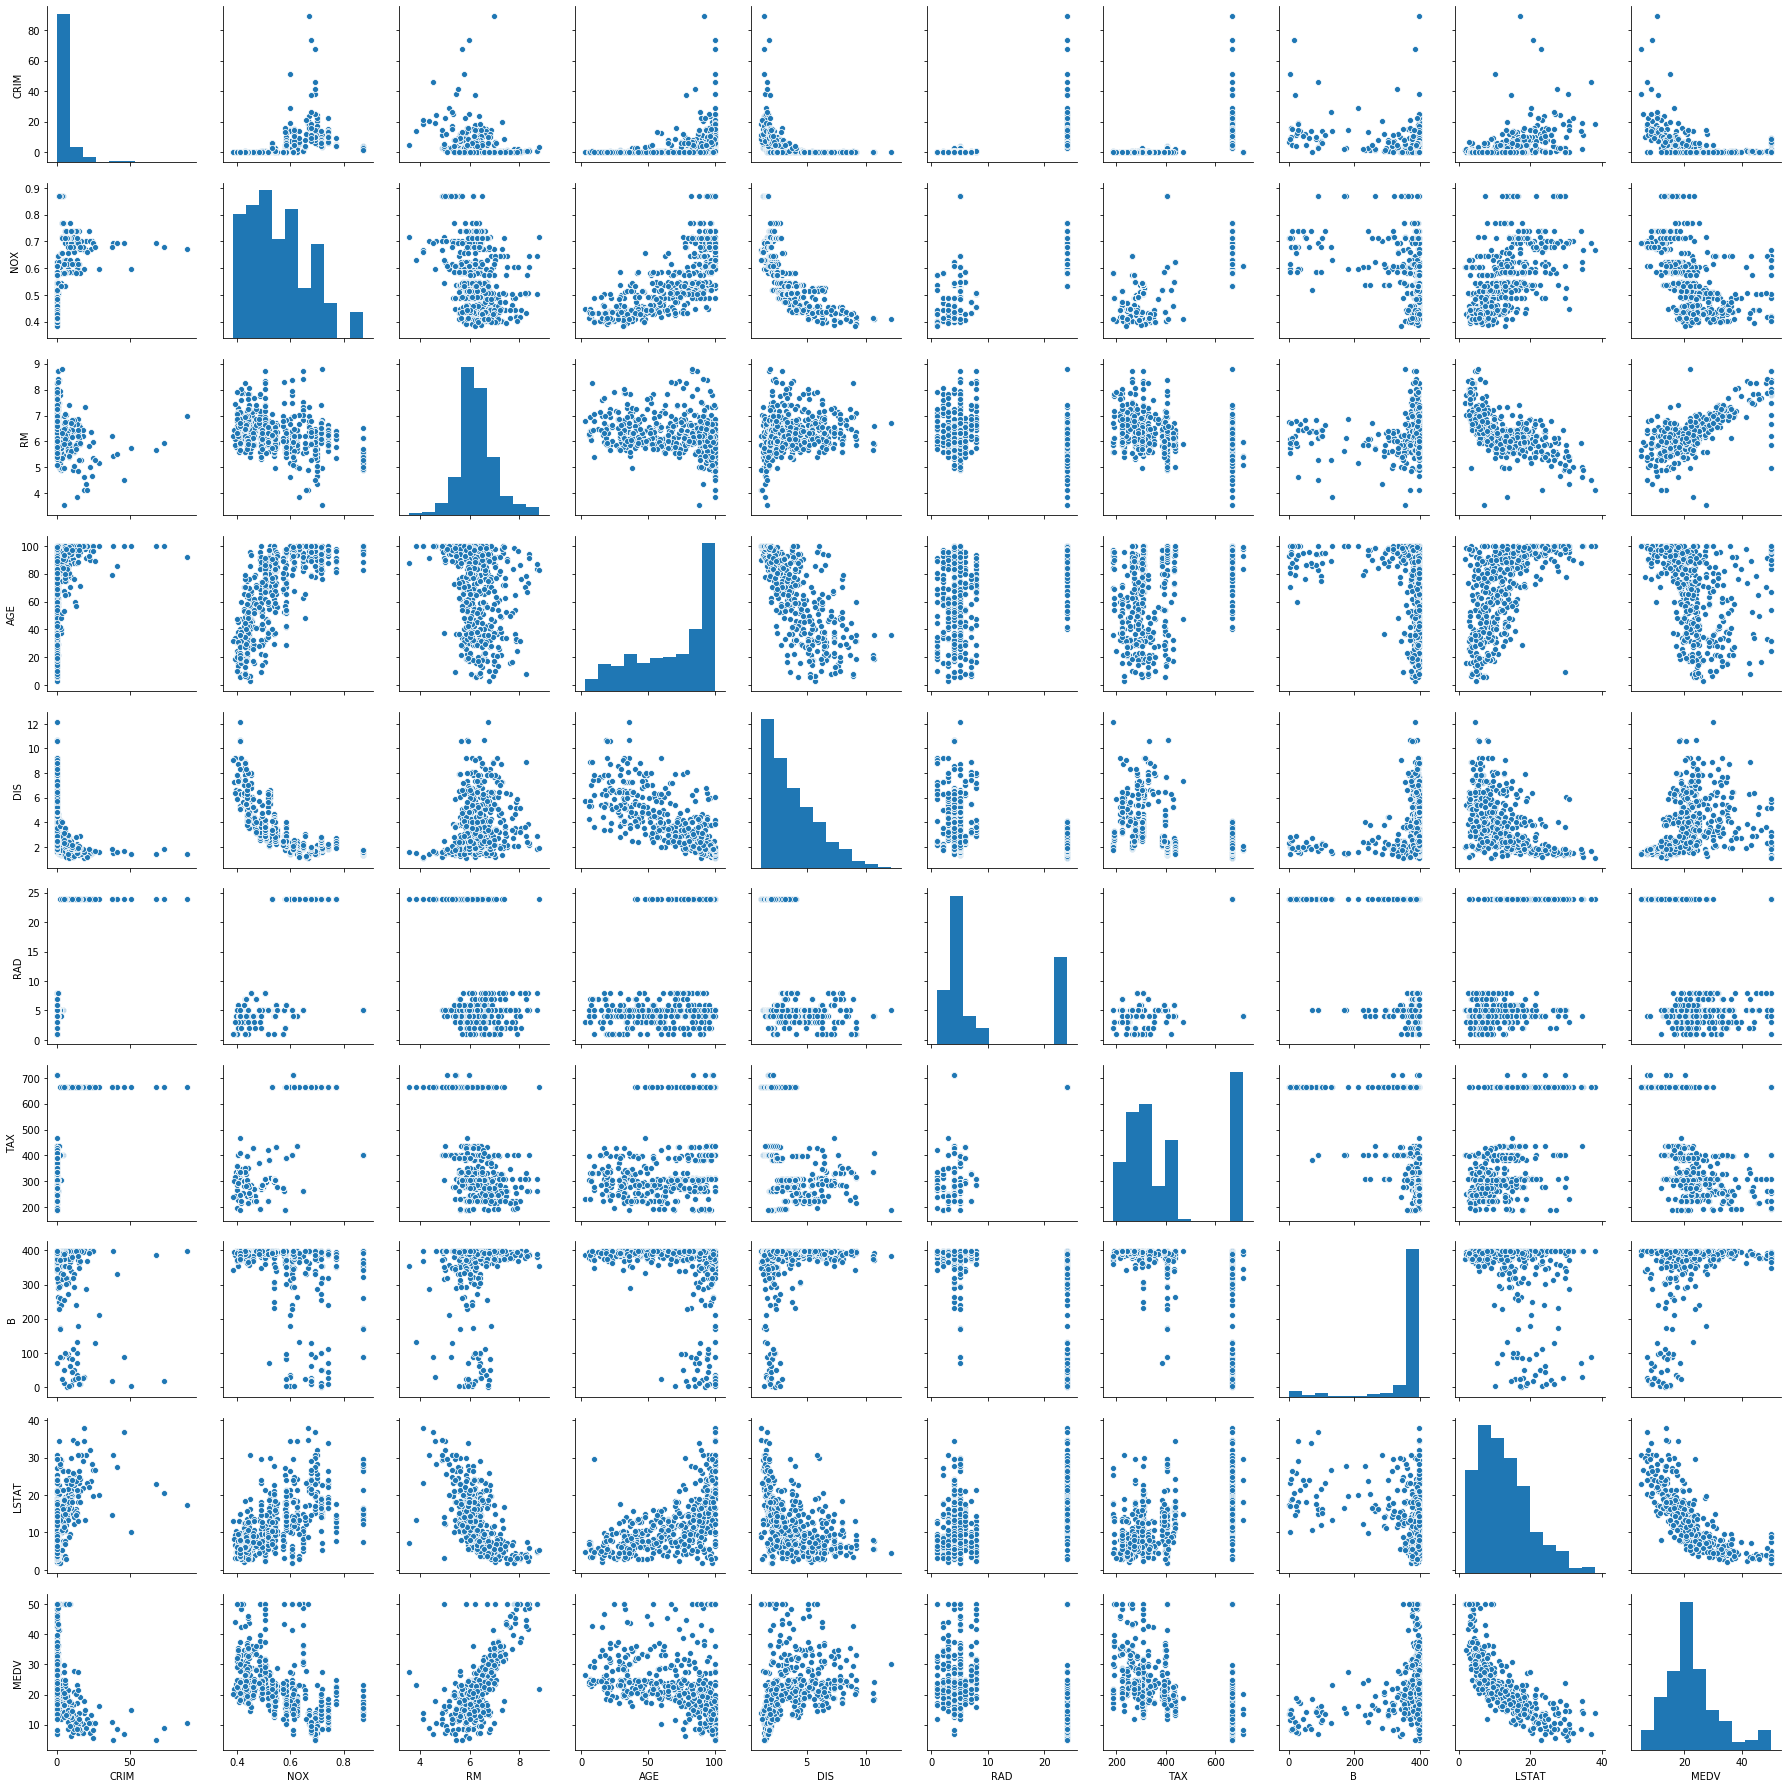

In [6]:
%%time
sns.pairplot(boston_df)

#как буд-то всё в порядке, выбросов нет

Wall time: 130 ms


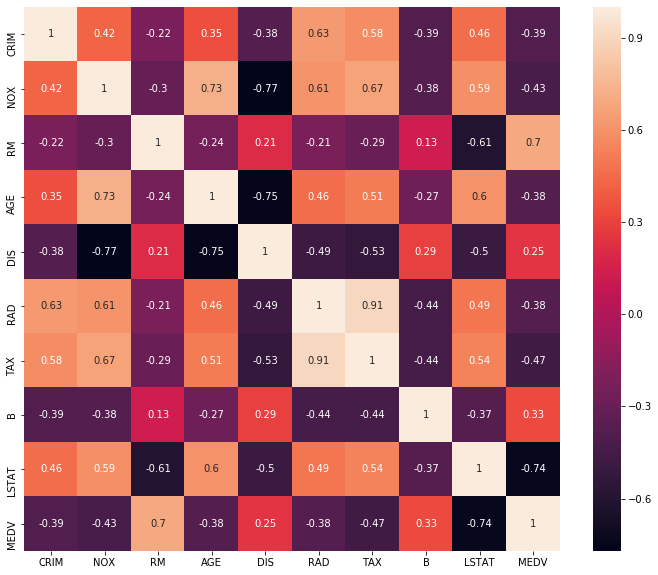

In [7]:
%%time
#строю корреляционную матрицу
correlation_matrix = boston_df.corr().round(2)
fig, ax = plt.subplots(figsize=(12,10)) 

sns.heatmap(data = correlation_matrix, annot=True)

Наибольшая корреляция MEDV с RM (Количество комнат) и если взять абсолютное значение с LSTAT (можно расценивать как престижность района) и дополнительно с TAX (налоги - можно предположить, что показатель интегральный). Еще можно отметить NOX (можно оценивать, как показатель экологии) - для меня это был бы один из главных параметров, но, видимо не для жителей Бостона.

Из перечичленных параметров:
У RM большая корреляция с LSTAT
У LSTAT с DIS, TAX, DIS, AGE, NOX
У TAX с RAD, DIS, NOX и CRM

У параметра В нет сильной корреции ни с одним другм, так, что, предположительно, его можно убрать и не потерять в точности.

In [8]:
#Делю датасет на 80% train и 20% test

#80% train
df_train = boston_df.sample(frac=0.8, random_state=1)

#20% test
df_test = boston_df.loc[~boston_df.index.isin(df_train.index)]

df_train.head()

,CRIM,NOX,RM,AGE,DIS,RAD,TAX,B,LSTAT,MEDV
307,0.04932,0.472,6.849,70.3,3.1827,7.0,222.0,396.90,7.53,28.2
343,0.02543,0.484,6.696,56.4,5.7321,5.0,370.0,396.90,7.18,23.9
47,0.22927,0.448,6.030,85.5,5.6894,3.0,233.0,392.74,18.80,16.6
67,0.05789,0.409,5.878,21.4,6.4980,4.0,345.0,396.21,8.10,22.0
362,3.67822,0.770,5.362,96.2,2.1036,24.0,666.0,380.79,10.19,20.8


In [9]:
df_test.head()

,CRIM,NOX,RM,AGE,DIS,RAD,TAX,B,LSTAT,MEDV
1,0.02731,0.469,6.421,78.9,4.9671,2.0,242.0,396.90,9.14,21.6
3,0.03237,0.458,6.998,45.8,6.0622,3.0,222.0,394.63,2.94,33.4
7,0.14455,0.524,6.172,96.1,5.9505,5.0,311.0,396.90,19.15,27.1
15,0.62739,0.538,5.834,56.5,4.4986,4.0,307.0,395.62,8.47,19.9
22,1.23247,0.538,6.142,91.7,3.9769,4.0,307.0,396.90,18.72,15.2


In [10]:
y_train = df_train['MEDV']
y_test = df_test['MEDV']
x_train = df_train.drop(['MEDV'], axis = 1)
x_test = df_test.drop(['MEDV'], axis = 1)

In [11]:
#Обучаю модель
LR = LinearRegression()

LR.fit(x_train, y_train)
LR.score(x_train, y_train)

print('Coefficient: \n', LR.coef_)
print('Intercept: \n', LR.intercept_)
print('R² Value: \n', LR.score(x_train, y_train))
predicted = LR.predict(x_test)


Coefficient: 
 [-0.0889228  -7.27481666  5.01692297 -0.02270519 -1.13833071  0.20017633
 -0.01341693  0.01075749 -0.5366538 ]
Intercept: 
 7.626660861867549
R² Value: 
 0.6870717681459151


In [12]:
#теперь удаляю фичу B и смотрю как изменилась модель

x_train_1 = df_train.drop(['B'], axis = 1)
x_test_1 = df_test.drop(['B'], axis = 1)

LR_1 = LinearRegression()

LR_1.fit(x_train_1, y_train)
LR_1.score(x_train_1, y_train)

print('Coefficient: \n', LR_1.coef_)
print('Intercept: \n', LR_1.intercept_)
print('R² Value: \n', LR_1.score(x_train_1, y_train))
predicted = LR_1.predict(x_test_1)

#Идеально ⊙﹏⊙

Coefficient: 
 [ 1.65517129e-16 -2.54934962e-14  1.11394319e-15  4.39752401e-16
 -1.18627981e-15  5.01768765e-16 -2.08166817e-17 -4.80952084e-16
  1.00000000e+00]
Intercept: 
 -7.105427357601002e-15
R² Value: 
 1.0


In [21]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score
scores = cross_val_score(LR, x_train_1, y_train, cv=5, scoring='r2')
print(scores)

[1. 1. 1. 1. 1.]
